In [1]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=5a8fcf697cea491ef5dcd4bd7fb14ab96bfff3492366c9cb69f15f6c72f7b122
  Stored in directory: C:\Users\Pallavi\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [69]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

# Visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report,precision_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# !pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

C:\Users\Pallavi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Loading Data

In [109]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


## Variable Description


ID	                Unique  Identifier for a row

City_Code	        Code for the City of the customers

Region_Code	        Code for the Region of the customers

Accomodation_Type	Customer Owns or Rents the house

Reco_Insurance_Type	Joint or Individual type for the recommended insurance

Upper_Age	        Maximum age of the customer 

Lower _Age	        Minimum age of the customer

Is_Spouse	        If the customers are married to each other

                    (in case of joint insurance) 

Health_Indicator    Encoded values for health of the customer

Holding_Policy_Duration	Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)

Holding_Policy_Type Type of holding policy

Reco_Policy_Cat	    Encoded value for recommended health insurance

Reco_Policy_Premium	Annual Premium (INR) for the recommended health insurance

Response (Target)	0 : Customer did not show interest in the recommended policy,
                    1 : Customer showed interest in the recommended policy


In [53]:
df_train.shape
df_test.shape

(50882, 14)

(21805, 13)

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [56]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50882.0,25441.500000,14688.512535,1.0,12721.25,25441.5,38161.75,50882.0
Region_Code,50882.0,1732.788707,1424.081652,1.0,523.00,1391.0,2667.00,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,28.00,44.0,59.00,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,27.00,40.0,57.00,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.00,3.0,3.00,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,12.00,17.0,20.00,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.00,13178.0,18096.00,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.00,0.0,0.00,1.0


In [57]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,21805.0,61785.000000,6294.705646,50883.0,56334.0,61785.0,67236.0,72687.0
Region_Code,21805.0,1748.737491,1438.358949,1.0,535.0,1392.0,2712.0,6185.0
Upper_Age,21805.0,44.877734,17.254898,18.0,28.0,44.0,59.0,75.0
Lower_Age,21805.0,42.748085,17.269112,16.0,27.0,41.0,57.0,75.0
Holding_Policy_Type,13202.0,2.440085,1.037627,1.0,1.0,3.0,3.0,4.0
Reco_Policy_Cat,21805.0,15.138363,6.302805,1.0,12.0,17.0,20.0,22.0
Reco_Policy_Premium,21805.0,14220.306581,6497.996164,2152.0,9285.0,13244.0,18201.6,43776.0


## Representation of missing values, unique values, etc.

In [58]:
def Missing_Values(data):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [59]:
train_info = Missing_Values(df_train)
test_info = Missing_Values(df_test)

In [60]:
train_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
Holding_Policy_Duration,50882,20251,0.3980,object,"[14+, nan, 1.0, 3.0, 5.0, 9.0, 14.0, 7.0, 2.0,...",16
Holding_Policy_Type,50882,20251,0.3980,float64,"[3.0, nan, 1.0, 4.0, 2.0]",5
Health Indicator,50882,11691,0.2298,object,"[X1, X2, nan, X4, X3, X6, X5, X8, X7, X9]",10
ID,50882,0,0.0000,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",50882
City_Code,50882,0,0.0000,object,"[C3, C5, C24, C8, C9, C1, C15, C28, C27, C7, C...",36
Region_Code,50882,0,0.0000,int64,"[3213, 1117, 3732, 4378, 2190, 1785, 679, 3175...",5316
Accomodation_Type,50882,0,0.0000,object,"[Rented, Owned]",2
Reco_Insurance_Type,50882,0,0.0000,object,"[Individual, Joint]",2
Upper_Age,50882,0,0.0000,int64,"[36, 75, 32, 52, 44, 28, 59, 21, 66, 20, 27, 3...",58


In [40]:
test_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
Holding_Policy_Duration,21805,8603,0.3945,object,"[6.0, 3.0, 2.0, nan, 14+, 5.0, 1.0, 4.0, 12.0,...",16
Holding_Policy_Type,21805,8603,0.3945,float64,"[3.0, 4.0, nan, 1.0, 2.0]",5
Health Indicator,21805,5027,0.2305,object,"[nan, X1, X3, X2, X5, X4, X7, X6, X9, X8]",10
ID,21805,0,0.0000,int64,"[50883, 50884, 50885, 50886, 50887, 50888, 508...",21805
City_Code,21805,0,0.0000,object,"[C1, C4, C3, C2, C13, C18, C16, C17, C11, C7, ...",36
Region_Code,21805,0,0.0000,int64,"[156, 7, 564, 1177, 951, 1329, 3479, 396, 513,...",4694
Accomodation_Type,21805,0,0.0000,object,"[Owned, Rented]",2
Reco_Insurance_Type,21805,0,0.0000,object,"[Individual, Joint]",2
Upper_Age,21805,0,0.0000,int64,"[30, 69, 28, 23, 75, 24, 56, 41, 22, 38, 42, 3...",58


In [13]:
#Columns that would not give information were removed

In [110]:
drop_list = ['ID', 'Region_Code']  
df_train_new = df_train.drop(drop_list,axis=1)
df_test_new= df_test.drop(drop_list, axis=1)

In [97]:
#We will change two numerical columns that have no oridnal value into categorical columns to be encoded later
df_train_new['Holding_Policy_Type_Cat'] = df_train_new['Holding_Policy_Type'].astype(str)
df_train_new['Reco_Policy_Cat_Cat'] = df_train_new['Reco_Policy_Cat'].astype(str)

df_test_new['Holding_Policy_Type_Cat'] = df_test_new['Holding_Policy_Type'].astype(str)
df_test_new['Reco_Policy_Cat_Cat'] = df_test_new['Reco_Policy_Cat'].astype(str)

In [98]:
# Drop the original numeric columns
df_train_new.drop(['Holding_Policy_Type','Reco_Policy_Cat'], axis=1, inplace=True)

df_test_new.drop(['Holding_Policy_Type','Reco_Policy_Cat'], axis=1, inplace=True)

## Segregation of numerical and categorical columns:


In [99]:
numerical_columns = ['Upper_Age','Lower_Age','Reco_Policy_Premium']
len(numerical_columns), numerical_columns

(3, ['Upper_Age', 'Lower_Age', 'Reco_Policy_Premium'])

In [100]:
categorical_columns = ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Health Indicator','Holding_Policy_Duration','Holding_Policy_Type_Cat','Reco_Policy_Cat_Cat']
len(categorical_columns),categorical_columns

(7,
 ['Accomodation_Type',
  'Reco_Insurance_Type',
  'Is_Spouse',
  'Health Indicator',
  'Holding_Policy_Duration',
  'Holding_Policy_Type_Cat',
  'Reco_Policy_Cat_Cat'])

# <a id="2"></a>2. Visualization


## Outlier Visualization With BoxPlot:

In [18]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(3):
            sns.boxplot(x = df[columns[count]], palette="Wistia",ax=ax[i][j])
            count = count+1

IndexError: list index out of range

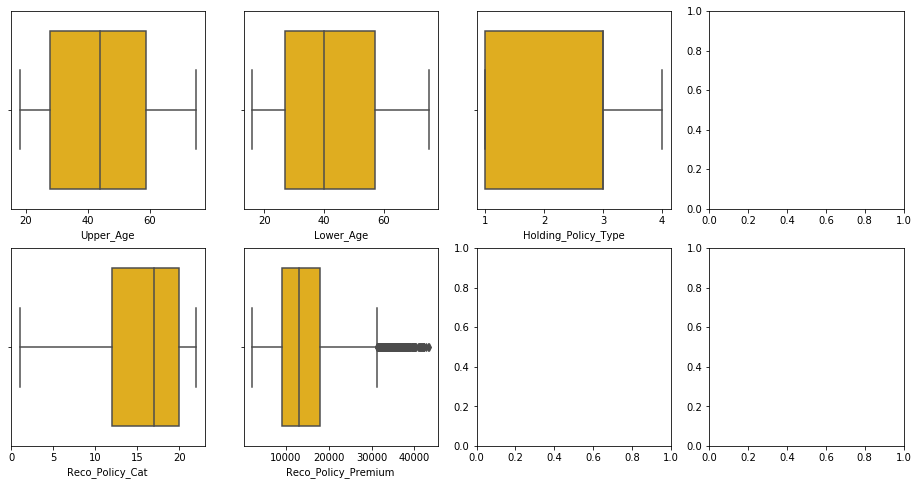

In [37]:
boxplot_for_outlier(df_train_new,numerical_columns)

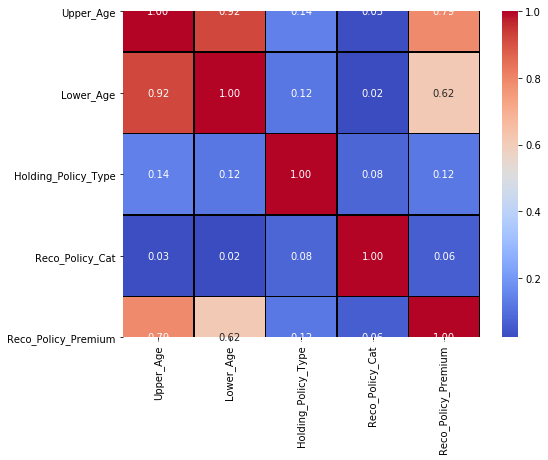

In [38]:
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df_train_new[numerical_columns].corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

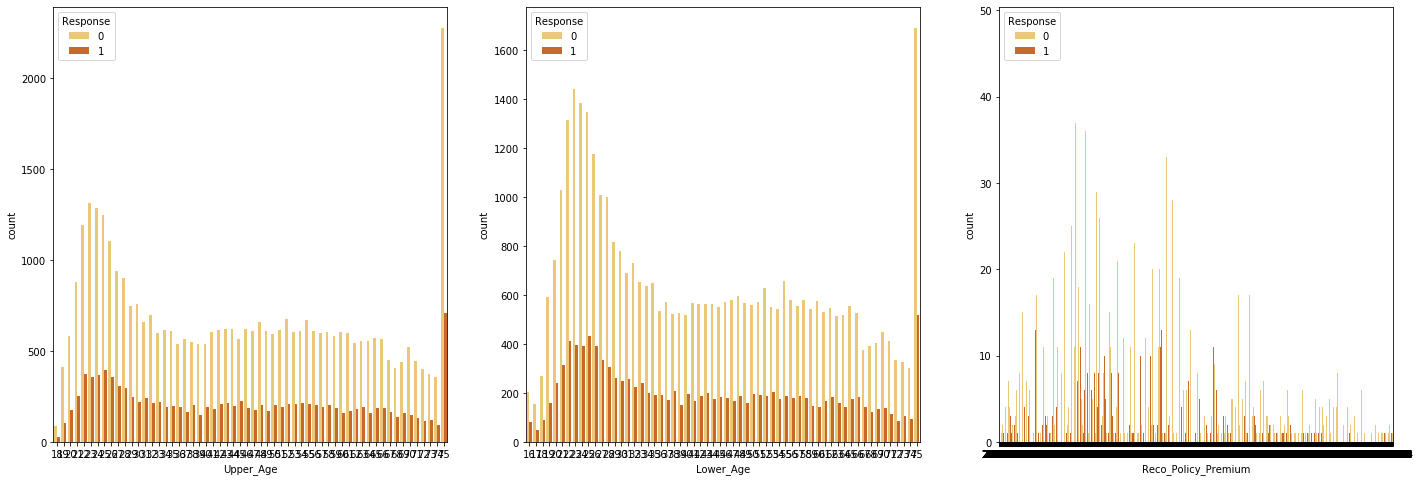

In [18]:
visual_list = ['Upper_Age','Lower_Age','Reco_Policy_Premium']
fig, ax =plt.subplots(nrows=1,ncols=3,figsize=(24,8))
count =0
for i in visual_list:
    sns.countplot(df_train_new[i], hue=df_train.Response, palette='YlOrBr', ax=ax[count]);
    count = count+1

### Examination and visualization of the effect of the target variable on insulin variable


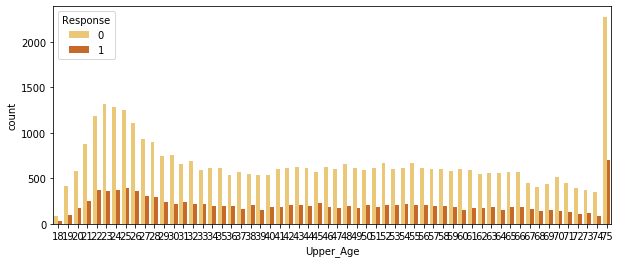

In [42]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(x="Upper_Age", hue="Response", data=df_train_new, palette="YlOrBr")
plt.show()

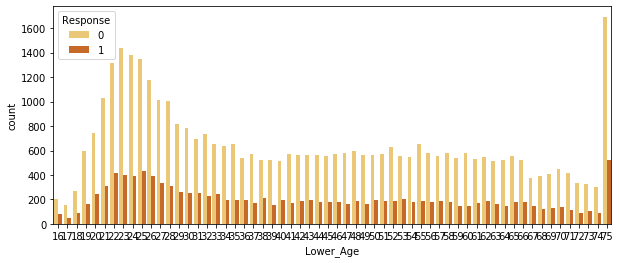

In [43]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(x="Lower_Age", hue="Response", data=df_train_new, palette="YlOrBr")
plt.show()

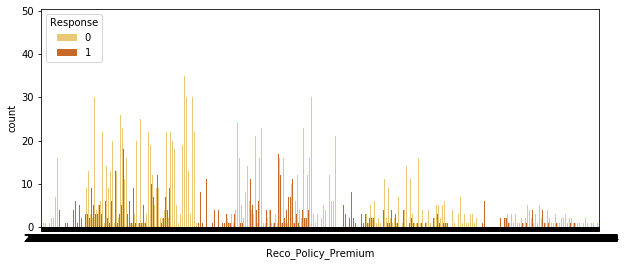

In [44]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(x="Reco_Policy_Premium", hue="Response", data=df_train_new, palette="YlOrBr")
plt.show()

In [19]:
def corr_2_cols(Col1, Col2):
    res = df_train_new.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [20]:
corr_2_cols('Lower_Age', 'Response')

Response,0,1,perc
Lower_Age,,,
16,203,80,0.282686
17,156,50,0.242718
18,268,91,0.253482
19,593,160,0.212483
20,744,241,0.244670
21,1028,313,0.233408
22,1314,413,0.239143
23,1442,398,0.216304
24,1384,391,0.220282


# <a id="3"></a>3. Feature Engineering


## Missing Value Filling

In [111]:
# Custom Missing Value filling of a column

df_train_new['Holding_Policy_Duration_Num'] = df_train_new['Holding_Policy_Duration'].replace('14+','15').astype('float')
df_test_new['Holding_Policy_Duration_Num'] = df_test_new['Holding_Policy_Duration'].replace('14+','15').astype('float')

In [112]:
df_train_new.drop('Holding_Policy_Duration', axis=1,inplace=True)
df_test_new.drop('Holding_Policy_Duration', axis=1,inplace=True)

In [103]:
Missing_Values(df_train_new)

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
Holding_Policy_Duration_Num,50882,20251,0.3980,float64,"[15.0, nan, 1.0, 3.0, 5.0, 9.0, 14.0, 7.0, 2.0...",16
Health Indicator,50882,11691,0.2298,object,"[X1, X2, nan, X4, X3, X6, X5, X8, X7, X9]",10
City_Code,50882,0,0.0000,object,"[C3, C5, C24, C8, C9, C1, C15, C28, C27, C7, C...",36
Accomodation_Type,50882,0,0.0000,object,"[Rented, Owned]",2
Reco_Insurance_Type,50882,0,0.0000,object,"[Individual, Joint]",2
Upper_Age,50882,0,0.0000,int64,"[36, 75, 32, 52, 44, 28, 59, 21, 66, 20, 27, 3...",58
Lower_Age,50882,0,0.0000,int64,"[36, 22, 32, 48, 44, 52, 28, 73, 43, 26, 21, 4...",60
Is_Spouse,50882,0,0.0000,object,"[No, Yes]",2
Reco_Policy_Premium,50882,0,0.0000,float64,"[11628.0, 30510.0, 7450.0, 17780.0, 10404.0, 1...",6977


In [51]:
df_test_new.isna().sum()

City_Code                           0
Accomodation_Type                   0
Reco_Insurance_Type                 0
Upper_Age                           0
Lower_Age                           0
Is_Spouse                           0
Health Indicator                 5027
Reco_Policy_Premium                 0
Holding_Policy_Type_Cat             0
Reco_Policy_Cat_Cat                 0
Holding_Policy_Duration_ffill       0
dtype: int64

In [141]:
# Binary ENcoders 
binary = ['Accomodation_Type', 'Is_Spouse','Reco_Insurance_Type']

from category_encoders import BinaryEncoder
binary_enc = BinaryEncoder(cols=binary)
df_train_new_enc = binary_enc.fit_transform(df_train_new)
df_test_new_enc = binary_enc.fit_transform(df_test_new)

In [142]:
df_train_new_enc.shape
df_test_new_enc.shape

(50882, 15)

(21805, 14)

In [143]:
# One Hot encoding for the other categorical 
cat_variables = df_train_new_enc[['City_Code','Health Indicator']]
cat_dummies = pd.get_dummies(cat_variables)
cat_dummies.head()

cat_variables2 = df_test_new_enc[['City_Code','Health Indicator']]
cat_dummies2 = pd.get_dummies(cat_variables2)
cat_dummies2.head()


,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [119]:
df_train_new_enc.head()

,City_Code,Accomodation_Type_0,Accomodation_Type_1,Reco_Insurance_Type_0,Reco_Insurance_Type_1,Upper_Age,Lower_Age,Is_Spouse_0,Is_Spouse_1,Health Indicator,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_Num
0,C3,0,1,0,1,36,36,0,1,X1,3.0,22,11628.0,0,15.0
1,C5,1,0,1,0,75,22,0,1,X2,NaN,22,30510.0,0,NaN
2,C5,1,0,0,1,32,32,0,1,NaN,1.0,19,7450.0,1,1.0
3,C24,1,0,1,0,52,48,0,1,X1,3.0,19,17780.0,0,15.0
4,C8,0,1,0,1,44,44,0,1,X2,1.0,16,10404.0,0,3.0


In [144]:
df_train_new_enc2 = df_train_new_enc.drop(['City_Code','Health Indicator'],axis=1)
df_train_new_enc = pd.concat([df_train_new_enc2,cat_dummies], axis=1)
df_train_new_enc.head()

,Accomodation_Type_0,Accomodation_Type_1,Reco_Insurance_Type_0,Reco_Insurance_Type_1,Upper_Age,Lower_Age,Is_Spouse_0,Is_Spouse_1,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_Num,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,0,1,0,1,36,36,0,1,3.0,22,11628.0,0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,1,0,75,22,0,1,NaN,22,30510.0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,1,32,32,0,1,1.0,19,7450.0,1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,52,48,0,1,3.0,19,17780.0,0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,1,44,44,0,1,1.0,16,10404.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [145]:
df_test_new_enc2= df_test_new_enc.drop(['City_Code','Health Indicator'], axis=1)
df_test_new_enc = pd.concat([df_test_new_enc2,cat_dummies2], axis=1)
df_test_new_enc.head()

,Accomodation_Type_0,Accomodation_Type_1,Reco_Insurance_Type_0,Reco_Insurance_Type_1,Upper_Age,Lower_Age,Is_Spouse_0,Is_Spouse_1,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_Num,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,0,1,0,1,30,30,0,1,3.0,5,11934.0,6.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,69,68,1,0,3.0,18,32204.8,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,1,28,28,0,1,4.0,17,9240.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,1,23,23,0,1,3.0,18,9086.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,1,75,75,0,1,NaN,5,22534.0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [146]:
df_train_new_enc.shape
df_test_new_enc.shape


(50882, 58)

(21805, 57)

In [124]:
df_test_new_enc.dtypes

Accomodation_Type_0              int64
Accomodation_Type_1              int64
Reco_Insurance_Type_0            int64
Reco_Insurance_Type_1            int64
Upper_Age                        int64
Lower_Age                        int64
Is_Spouse_0                      int64
Is_Spouse_1                      int64
Holding_Policy_Type            float64
Reco_Policy_Cat                  int64
Reco_Policy_Premium            float64
Holding_Policy_Duration_Num    float64
Reco_Policy_Cat                  int64
Holding_Policy_Type            float64
City_Code_C1                     uint8
City_Code_C10                    uint8
City_Code_C11                    uint8
City_Code_C12                    uint8
City_Code_C13                    uint8
City_Code_C14                    uint8
City_Code_C15                    uint8
City_Code_C16                    uint8
City_Code_C17                    uint8
City_Code_C18                    uint8
City_Code_C19                    uint8
City_Code_C2             

In [147]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train_new_scaled = pd.DataFrame(scaler.fit_transform(df_train_new_enc), columns = df_train_new_enc.columns)
df_train_new_scaled.head()

,Accomodation_Type_0,Accomodation_Type_1,Reco_Insurance_Type_0,Reco_Insurance_Type_1,Upper_Age,Lower_Age,Is_Spouse_0,Is_Spouse_1,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Holding_Policy_Duration_Num,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,0.0,1.0,0.0,1.0,0.315789,0.338983,0.0,1.0,0.666667,1.000000,0.227609,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.000000,0.101695,0.0,1.0,NaN,1.000000,0.687356,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.245614,0.271186,0.0,1.0,0.000000,0.857143,0.125881,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.596491,0.542373,0.0,1.0,0.666667,0.857143,0.377401,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.456140,0.474576,0.0,1.0,0.000000,0.714286,0.197807,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
df_test_new_scaled = pd.DataFrame(scaler.fit_transform(df_test_new_enc), columns = df_test_new_enc.columns)
df_test_new_scaled.head()

,Accomodation_Type_0,Accomodation_Type_1,Reco_Insurance_Type_0,Reco_Insurance_Type_1,Upper_Age,Lower_Age,Is_Spouse_0,Is_Spouse_1,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Holding_Policy_Duration_Num,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,0.0,1.0,0.0,1.0,0.210526,0.237288,0.0,1.0,0.666667,0.190476,0.235009,0.357143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.894737,0.881356,1.0,0.0,0.666667,0.809524,0.722007,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.175439,0.203390,0.0,1.0,1.000000,0.761905,0.170286,0.071429,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.087719,0.118644,0.0,1.0,0.666667,0.809524,0.166587,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.000000,1.000000,0.0,1.0,NaN,0.190476,0.489669,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_train_new_imputed = pd.DataFrame(imputer.fit_transform(df_train_new_enc),columns = df_train_new_enc.columns)

In [150]:
df_test_new_imputed = pd.DataFrame(imputer.fit_transform(df_test_new_enc),columns = df_test_new_enc.columns)

In [152]:
df_train_new_imputed.isna().any()
df_test_new_imputed.isna().any()


Accomodation_Type_0            False
Accomodation_Type_1            False
Reco_Insurance_Type_0          False
Reco_Insurance_Type_1          False
Upper_Age                      False
Lower_Age                      False
Is_Spouse_0                    False
Is_Spouse_1                    False
Holding_Policy_Type            False
Reco_Policy_Cat                False
Reco_Policy_Premium            False
Response                       False
Holding_Policy_Duration_Num    False
City_Code_C1                   False
City_Code_C10                  False
City_Code_C11                  False
City_Code_C12                  False
City_Code_C13                  False
City_Code_C14                  False
City_Code_C15                  False
City_Code_C16                  False
City_Code_C17                  False
City_Code_C18                  False
City_Code_C19                  False
City_Code_C2                   False
City_Code_C20                  False
City_Code_C21                  False
C

Accomodation_Type_0            False
Accomodation_Type_1            False
Reco_Insurance_Type_0          False
Reco_Insurance_Type_1          False
Upper_Age                      False
Lower_Age                      False
Is_Spouse_0                    False
Is_Spouse_1                    False
Holding_Policy_Type            False
Reco_Policy_Cat                False
Reco_Policy_Premium            False
Holding_Policy_Duration_Num    False
City_Code_C1                   False
City_Code_C10                  False
City_Code_C11                  False
City_Code_C12                  False
City_Code_C13                  False
City_Code_C14                  False
City_Code_C15                  False
City_Code_C16                  False
City_Code_C17                  False
City_Code_C18                  False
City_Code_C19                  False
City_Code_C2                   False
City_Code_C20                  False
City_Code_C21                  False
City_Code_C22                  False
C

In [153]:
df_train_new_imputed.shape
df_test_new_imputed.shape


(50882, 58)

(21805, 57)

In [154]:
#We will change two numerical columns that have no oridnal value into categorical columns to be encoded later

df_train_new_imputed['Holding_Policy_Type_Cat'] = df_train_new_imputed['Holding_Policy_Type'].astype(str)
df_train_new_imputed['Reco_Policy_Cat_Cat'] = df_train_new_imputed['Reco_Policy_Cat'].astype(str)

df_test_new_imputed['Holding_Policy_Type_Cat'] = df_test_new_imputed['Holding_Policy_Type'].astype(str)
df_test_new_imputed['Reco_Policy_Cat_Cat'] = df_test_new_imputed['Reco_Policy_Cat'].astype(str)

In [155]:
# Drop the original numeric columns
df_train_new_imputed.drop(['Holding_Policy_Type','Reco_Policy_Cat'], axis=1, inplace=True)

df_test_new_imputed.drop(['Holding_Policy_Type','Reco_Policy_Cat'], axis=1, inplace=True)

In [156]:
cat_variables = df_train_new_imputed[['Holding_Policy_Type_Cat','Reco_Policy_Cat_Cat']]
cat_dummies = pd.get_dummies(cat_variables,drop_first=True)
cat_dummies.head()

cat_variables2 = df_test_new_imputed[['Holding_Policy_Type_Cat','Reco_Policy_Cat_Cat']]
cat_dummies2 = pd.get_dummies(cat_variables2,drop_first=True)
cat_dummies2.head()

,Holding_Policy_Type_Cat_1.2,Holding_Policy_Type_Cat_1.4,Holding_Policy_Type_Cat_1.6,Holding_Policy_Type_Cat_1.8,Holding_Policy_Type_Cat_2.0,Holding_Policy_Type_Cat_2.2,Holding_Policy_Type_Cat_2.4,Holding_Policy_Type_Cat_2.6,Holding_Policy_Type_Cat_2.8,Holding_Policy_Type_Cat_3.0,Holding_Policy_Type_Cat_3.2,Holding_Policy_Type_Cat_3.4,Holding_Policy_Type_Cat_3.6,Holding_Policy_Type_Cat_3.8,Holding_Policy_Type_Cat_4.0,Reco_Policy_Cat_Cat_10.0,Reco_Policy_Cat_Cat_11.0,Reco_Policy_Cat_Cat_12.0,Reco_Policy_Cat_Cat_13.0,Reco_Policy_Cat_Cat_14.0,Reco_Policy_Cat_Cat_15.0,Reco_Policy_Cat_Cat_16.0,Reco_Policy_Cat_Cat_17.0,Reco_Policy_Cat_Cat_18.0,Reco_Policy_Cat_Cat_19.0,Reco_Policy_Cat_Cat_2.0,Reco_Policy_Cat_Cat_20.0,Reco_Policy_Cat_Cat_21.0,Reco_Policy_Cat_Cat_22.0,Reco_Policy_Cat_Cat_3.0,Reco_Policy_Cat_Cat_4.0,Reco_Policy_Cat_Cat_5.0,Reco_Policy_Cat_Cat_6.0,Reco_Policy_Cat_Cat_7.0,Reco_Policy_Cat_Cat_8.0,Reco_Policy_Cat_Cat_9.0
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Holding_Policy_Type_Cat_1.2,Holding_Policy_Type_Cat_1.4,Holding_Policy_Type_Cat_1.6,Holding_Policy_Type_Cat_1.8,Holding_Policy_Type_Cat_2.0,Holding_Policy_Type_Cat_2.2,Holding_Policy_Type_Cat_2.4,Holding_Policy_Type_Cat_2.6,Holding_Policy_Type_Cat_2.8,Holding_Policy_Type_Cat_3.0,Holding_Policy_Type_Cat_3.2,Holding_Policy_Type_Cat_3.4,Holding_Policy_Type_Cat_3.6,Holding_Policy_Type_Cat_3.8,Holding_Policy_Type_Cat_4.0,Reco_Policy_Cat_Cat_10.0,Reco_Policy_Cat_Cat_11.0,Reco_Policy_Cat_Cat_12.0,Reco_Policy_Cat_Cat_13.0,Reco_Policy_Cat_Cat_14.0,Reco_Policy_Cat_Cat_15.0,Reco_Policy_Cat_Cat_16.0,Reco_Policy_Cat_Cat_17.0,Reco_Policy_Cat_Cat_18.0,Reco_Policy_Cat_Cat_19.0,Reco_Policy_Cat_Cat_2.0,Reco_Policy_Cat_Cat_20.0,Reco_Policy_Cat_Cat_21.0,Reco_Policy_Cat_Cat_22.0,Reco_Policy_Cat_Cat_3.0,Reco_Policy_Cat_Cat_4.0,Reco_Policy_Cat_Cat_5.0,Reco_Policy_Cat_Cat_6.0,Reco_Policy_Cat_Cat_7.0,Reco_Policy_Cat_Cat_8.0,Reco_Policy_Cat_Cat_9.0
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [158]:
df_train_new_imputed_enc = df_train_new_imputed.drop(['Holding_Policy_Type_Cat','Reco_Policy_Cat_Cat'], axis=1)
df_train_new_imputed_enc = pd.concat([df_train_new_imputed_enc,cat_dummies], axis=1)
df_train_new_imputed_enc.head()

,Accomodation_Type_0,Accomodation_Type_1,Reco_Insurance_Type_0,Reco_Insurance_Type_1,Upper_Age,Lower_Age,Is_Spouse_0,Is_Spouse_1,Reco_Policy_Premium,Response,Holding_Policy_Duration_Num,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Holding_Policy_Type_Cat_1.2,Holding_Policy_Type_Cat_1.4,Holding_Policy_Type_Cat_1.6,Holding_Policy_Type_Cat_1.8,Holding_Policy_Type_Cat_2.0,Holding_Policy_Type_Cat_2.2,Holding_Policy_Type_Cat_2.4,Holding_Policy_Type_Cat_2.6,Holding_Policy_Type_Cat_2.8,Holding_Policy_Type_Cat_3.0,Holding_Policy_Type_Cat_3.2,Holding_Policy_Type_Cat_3.4,Holding_Policy_Type_Cat_3.6,Holding_Policy_Type_Cat_3.8,Holding_Policy_Type_Cat_4.0,Reco_Policy_Cat_Cat_10.0,Reco_Policy_Cat_Cat_11.0,Reco_Policy_Cat_Cat_12.0,Reco_Policy_Cat_Cat_13.0,Reco_Policy_Cat_Cat_14.0,Reco_Policy_Cat_Cat_15.0,Reco_Policy_Cat_Cat_16.0,Reco_Policy_Cat_Cat_17.0,Reco_Policy_Cat_Cat_18.0,Reco_Policy_Cat_Cat_19.0,Reco_Policy_Cat_Cat_2.0,Reco_Policy_Cat_Cat_20.0,Reco_Policy_Cat_Cat_21.0,Reco_Policy_Cat_Cat_22.0,Reco_Policy_Cat_Cat_3.0,Reco_Policy_Cat_Cat_4.0,Reco_Policy_Cat_Cat_5.0,Reco_Policy_Cat_Cat_6.0,Reco_Policy_Cat_Cat_7.0,Reco_Policy_Cat_Cat_8.0,Reco_Policy_Cat_Cat_9.0
0,0.0,1.0,0.0,1.0,36.0,36.0,0.0,1.0,11628.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1.0,0.0,1.0,0.0,75.0,22.0,0.0,1.0,30510.0,0.0,8.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1.0,0.0,0.0,1.0,32.0,32.0,0.0,1.0,7450.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,1.0,0.0,52.0,48.0,0.0,1.0,17780.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,0.0,1.0,44.0,44.0,0.0,1.0,10404.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [159]:
df_test_new_imputed_enc = df_test_new_imputed.drop(['Holding_Policy_Type_Cat','Reco_Policy_Cat_Cat'], axis=1)
df_test_new_imputed_enc = pd.concat([df_test_new_imputed_enc,cat_dummies2], axis=1)
df_test_new_imputed_enc.head()

,Accomodation_Type_0,Accomodation_Type_1,Reco_Insurance_Type_0,Reco_Insurance_Type_1,Upper_Age,Lower_Age,Is_Spouse_0,Is_Spouse_1,Reco_Policy_Premium,Holding_Policy_Duration_Num,City_Code_C1,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,City_Code_C2,City_Code_C20,City_Code_C21,City_Code_C22,City_Code_C23,City_Code_C24,City_Code_C25,City_Code_C26,City_Code_C27,City_Code_C28,City_Code_C29,City_Code_C3,City_Code_C30,City_Code_C31,City_Code_C32,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9,Holding_Policy_Type_Cat_1.2,Holding_Policy_Type_Cat_1.4,Holding_Policy_Type_Cat_1.6,Holding_Policy_Type_Cat_1.8,Holding_Policy_Type_Cat_2.0,Holding_Policy_Type_Cat_2.2,Holding_Policy_Type_Cat_2.4,Holding_Policy_Type_Cat_2.6,Holding_Policy_Type_Cat_2.8,Holding_Policy_Type_Cat_3.0,Holding_Policy_Type_Cat_3.2,Holding_Policy_Type_Cat_3.4,Holding_Policy_Type_Cat_3.6,Holding_Policy_Type_Cat_3.8,Holding_Policy_Type_Cat_4.0,Reco_Policy_Cat_Cat_10.0,Reco_Policy_Cat_Cat_11.0,Reco_Policy_Cat_Cat_12.0,Reco_Policy_Cat_Cat_13.0,Reco_Policy_Cat_Cat_14.0,Reco_Policy_Cat_Cat_15.0,Reco_Policy_Cat_Cat_16.0,Reco_Policy_Cat_Cat_17.0,Reco_Policy_Cat_Cat_18.0,Reco_Policy_Cat_Cat_19.0,Reco_Policy_Cat_Cat_2.0,Reco_Policy_Cat_Cat_20.0,Reco_Policy_Cat_Cat_21.0,Reco_Policy_Cat_Cat_22.0,Reco_Policy_Cat_Cat_3.0,Reco_Policy_Cat_Cat_4.0,Reco_Policy_Cat_Cat_5.0,Reco_Policy_Cat_Cat_6.0,Reco_Policy_Cat_Cat_7.0,Reco_Policy_Cat_Cat_8.0,Reco_Policy_Cat_Cat_9.0
0,0.0,1.0,0.0,1.0,30.0,30.0,0.0,1.0,11934.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.0,1.0,1.0,0.0,69.0,68.0,1.0,0.0,32204.8,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,1.0,28.0,28.0,0.0,1.0,9240.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,0.0,1.0,23.0,23.0,0.0,1.0,9086.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,1.0,0.0,1.0,75.0,75.0,0.0,1.0,22534.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [160]:
df_train_new_imputed_enc.shape
df_test_new_imputed_enc.shape

(50882, 92)

(21805, 91)

# <a id="4"></a>4. Train-Test Splitting

In [161]:
X = df_train_new_imputed_enc.drop(['Response'], axis=1)
y = df_train_new_imputed_enc['Response']

In [162]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Resampling techniques - SMOTE

Since we have an unbalanced dataset, We will use sampling technique.

In [163]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=587)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
print(y_SMOTE.value_counts())

1.0    30985
0.0    30985
Name: Response, dtype: int64


## Train-Validation Splitting

In [164]:
X_train, X_val, y_train, y_val = train_test_split(X_SMOTE, y_SMOTE, test_size = 0.2, random_state = 42)

# <a id="5"></a>5. Modelling

## Model Selection

In [165]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    fscore = f1_score(y_actual,(y_pred > thresh) )
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('fscore:%.3f'%fscore)
    print('specificity:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision,fscore, specificity

In [166]:
thresh = 0

## Model Selection: Baseline Models

## Logistic Regression

In [167]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,f1_score

In [168]:
log_model = LogisticRegression(solver = "liblinear",class_weight="balanced",random_state = 42).fit(X_train, y_train)

In [169]:
y_train_preds = log_model.predict_proba(X_train)[:,1]
y_val_preds = log_model.predict_proba(X_val)[:,1]

print("Logistic Regression")
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_fscore, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_val_auc, lr_val_accuracy, lr_val_recall, \
    lr_val_precision,lr_val_fscore, lr_val_specificity = print_report(y_val,y_val_preds, thresh)

Logistic Regression
Training:
AUC:0.844
accuracy:0.500
recall:1.000
precision:0.500
fscore:0.666
specificity:0.000
 
Validation:
AUC:0.839
accuracy:0.502
recall:1.000
precision:0.502
fscore:0.668
specificity:0.000
 


## Random Forest Classifier

In [170]:
random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_depth=3)
random_forest_model.fit(X_train, y_train) 

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [171]:
 n

Random Forest
Training:
AUC:0.828
accuracy:0.500
recall:1.000
precision:0.500
fscore:0.666
specificity:0.000
 
Validation:
AUC:0.827
accuracy:0.502
recall:1.000
precision:0.502
fscore:0.668
specificity:0.000
 


## Gradient Boosting Classifier


In [172]:
gradient_model = GradientBoostingClassifier(random_state=42)
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [173]:
y_train_preds = gradient_model.predict_proba(X_train)[:,1]
y_val_preds = gradient_model.predict_proba(X_val)[:,1]

print("Gradient Boosing")
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision,gbc_train_fscore, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_val_auc, gbc_val_accuracy, gbc_val_recall, gbc_val_precision, gbc_val_fscore, gbc_val_specificity = print_report(y_val,y_val_preds, thresh)

Gradient Boosing
Training:
AUC:0.879
accuracy:0.500
recall:1.000
precision:0.500
fscore:0.666
specificity:0.000
 
Validation:
AUC:0.871
accuracy:0.502
recall:1.000
precision:0.502
fscore:0.668
specificity:0.000
 


## XGBOOST Classifier

In [174]:
xgb_model = XGBClassifier(random_state=42, n_jobs=-1,max_depth=3)
xgb_model.fit(X_train, y_train)

[20:28:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [175]:
y_train_preds = xgb_model.predict_proba(X_train)[:,1]
y_val_preds = xgb_model.predict_proba(X_val)[:,1]

print("XGBOOST")
y_train_preds = gradient_model.predict_proba(X_train)[:,1]
y_val_preds = gradient_model.predict_proba(X_val)[:,1]

print("Gradient Boosing")
print('Training:')
xgb_train_auc, xgb_train_accuracy, xgb_train_recall, xgb_train_precision, xgb_train_fscore, xgb_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
xgb_val_auc, xgb_val_accuracy, xgb_val_recall, xgb_val_precision,xgb_val_fscore, xgb_val_specificity = print_report(y_val,y_val_preds, thresh)

XGBOOST
Gradient Boosing
Training:
AUC:0.879
accuracy:0.500
recall:1.000
precision:0.500
fscore:0.666
specificity:0.000
 
Validation:
AUC:0.871
accuracy:0.502
recall:1.000
precision:0.502
fscore:0.668
specificity:0.000
 


In [176]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state = 42,max_depth=3)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(max_depth=3, random_state=42)

In [177]:
y_train_preds = lgbm_model.predict_proba(X_train)[:,1]
y_val_preds = lgbm_model.predict_proba(X_val)[:,1]

print("LGBM")
print('Training:')
lgbm_train_auc, lgbm_train_accuracy,lgbm_train_recall, lgbm_train_precision,lgbm_train_fscore,lgbm_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lgbm_val_auc, lgbm_val_accuracy, lgbm_val_recall, lgbm_val_precision,lgbm_val_fscore,lgbm_val_specificity = print_report(y_val,y_val_preds, thresh)

LGBM
Training:
AUC:0.878
accuracy:0.500
recall:1.000
precision:0.500
fscore:0.666
specificity:0.000
 
Validation:
AUC:0.870
accuracy:0.502
recall:1.000
precision:0.502
fscore:0.668
specificity:0.000
 


In [178]:
cat_model = CatBoostClassifier(random_state = 42, max_depth=3)
cat_model.fit(X_train, y_train,verbose=False)

In [179]:
y_train_preds = cat_model.predict_proba(X_train)[:,1]
y_val_preds = cat_model.predict_proba(X_val)[:,1]

print("CATBOOST")
print('Training:')
catb_train_auc, catb_train_accuracy,catb_train_recall, catb_train_precision,catb_train_fscore,catb_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
catb_val_auc,catb_val_accuracy, catb_val_recall, catb_val_precision,catb_val_fscore,catb_val_specificity = print_report(y_val,y_val_preds, thresh)

CATBOOST
Training:
AUC:0.900
accuracy:0.500
recall:1.000
precision:0.500
fscore:0.666
specificity:0.000
 
Validation:
AUC:0.884
accuracy:0.502
recall:1.000
precision:0.502
fscore:0.668
specificity:0.000
 


## Analyze results baseline models

In [180]:
base_models_results = pd.DataFrame({'classifier':['LOJ','LOJ','RF','RF','GBM','GBM','XGB','XGB','LGBM','LGBM','CATB','CATB'],
                           'data_set':['train','val']*6,
                          'auc':[lr_train_auc, lr_val_auc,rf_train_auc,rf_val_auc,gbc_train_auc,gbc_val_auc,xgb_train_auc,xgb_val_auc,lgbm_train_auc,lgbm_val_auc,catb_train_auc,catb_val_auc,],
                          'accuracy':[lr_train_accuracy, lr_val_accuracy,rf_train_accuracy,rf_val_accuracy,gbc_train_accuracy,gbc_val_accuracy,xgb_train_accuracy,xgb_val_accuracy,lgbm_train_accuracy,lgbm_val_accuracy,catb_train_accuracy,catb_val_accuracy,],
                          'recall':[lr_train_recall, lr_val_recall,rf_train_recall,rf_val_recall,gbc_train_recall,gbc_val_recall,xgb_train_recall,xgb_val_recall,lgbm_train_recall,lgbm_val_recall,catb_train_recall,catb_val_recall,],
                          'precision':[lr_train_precision, lr_val_precision,rf_train_precision,rf_val_precision,gbc_train_precision,gbc_val_precision,xgb_train_precision,xgb_val_precision,lgbm_train_precision,lgbm_val_precision,catb_train_precision,catb_val_precision,],
                          'fscore':[lr_train_fscore, lr_val_fscore,rf_train_fscore,rf_val_fscore,gbc_train_fscore,gbc_val_fscore,xgb_train_fscore,xgb_val_fscore,lgbm_train_fscore,lgbm_val_fscore,catb_train_fscore,catb_val_fscore,],
                          'specificity':[lr_train_specificity, lr_val_specificity,rf_train_specificity,rf_val_specificity,gbc_train_specificity,gbc_val_specificity,xgb_train_specificity,xgb_val_specificity,lgbm_train_specificity,lgbm_val_specificity,catb_train_specificity,catb_val_specificity,]})

In [181]:
base_models_results

,classifier,data_set,auc,accuracy,recall,precision,fscore,specificity
0,LOJ,train,0.843736,0.499556,1.0,0.499556,0.666272,0.0
1,LOJ,val,0.839455,0.501775,1.0,0.501775,0.668243,0.0
2,RF,train,0.827847,0.499556,1.0,0.499556,0.666272,0.0
3,RF,val,0.826662,0.501775,1.0,0.501775,0.668243,0.0
4,GBM,train,0.879077,0.499556,1.0,0.499556,0.666272,0.0
5,GBM,val,0.871444,0.501775,1.0,0.501775,0.668243,0.0
6,XGB,train,0.879077,0.499556,1.0,0.499556,0.666272,0.0
7,XGB,val,0.871444,0.501775,1.0,0.501775,0.668243,0.0
8,LGBM,train,0.878191,0.499556,1.0,0.499556,0.666272,0.0
9,LGBM,val,0.870094,0.501775,1.0,0.501775,0.668243,0.0


## Feature İmportance with Light-GBM Classifier

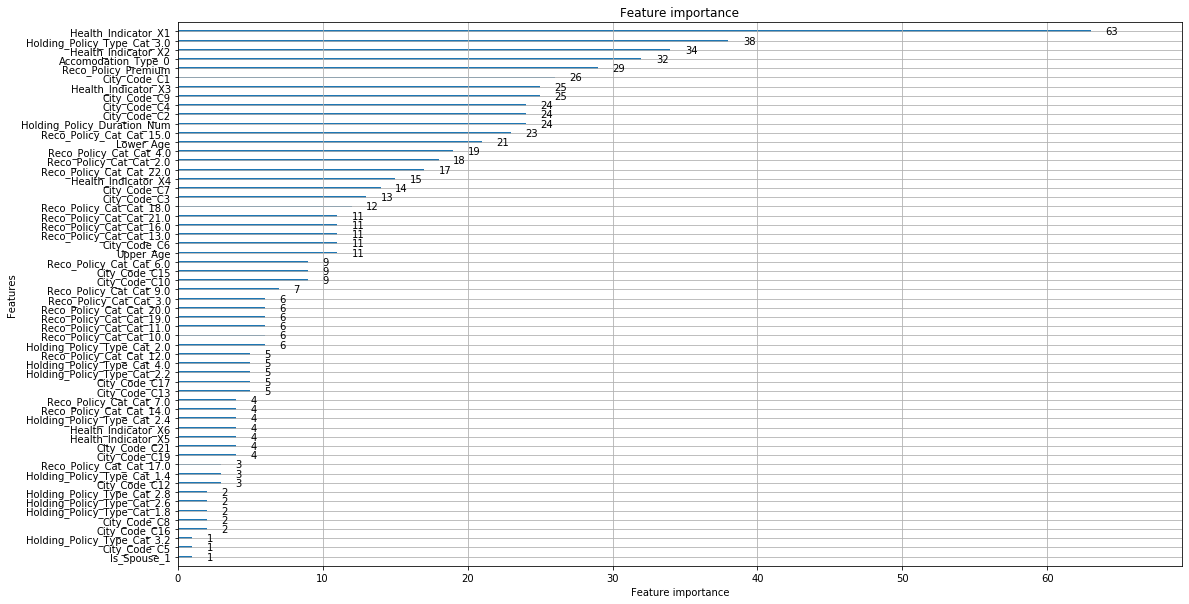

In [182]:
import lightgbm as lgb

plt.rcParams["figure.figsize"] = (18, 10)
lgb.plot_importance(lgbm_model)

feature_imp = pd.Series(lgbm_model.feature_importances_, index = X_train.columns)
best_features = feature_imp.nlargest(25)

In [183]:
best_features.index

Index(['Health Indicator_X1', 'Holding_Policy_Type_Cat_3.0',
       'Health Indicator_X2', 'Accomodation_Type_0', 'Reco_Policy_Premium',
       'City_Code_C1', 'City_Code_C9', 'Health Indicator_X3',
       'Holding_Policy_Duration_Num', 'City_Code_C2', 'City_Code_C4',
       'Reco_Policy_Cat_Cat_15.0', 'Lower_Age', 'Reco_Policy_Cat_Cat_4.0',
       'Reco_Policy_Cat_Cat_2.0', 'Reco_Policy_Cat_Cat_22.0',
       'Health Indicator_X4', 'City_Code_C7', 'City_Code_C3',
       'Reco_Policy_Cat_Cat_18.0', 'Upper_Age', 'City_Code_C6',
       'Reco_Policy_Cat_Cat_13.0', 'Reco_Policy_Cat_Cat_16.0',
       'Reco_Policy_Cat_Cat_21.0'],
      dtype='object')

In [61]:
X_train_importance = X_train[best_features.index]
X_val_importance = X_val[best_features.index]


# <a id="8"></a>8. Prediction Result


## Model Selection: Best Classifier

In [184]:
best_model = cat_model #rf_tuned,lgbm_tuned,catb_tuned

y_train_preds = best_model.predict_proba(X_train)[:,1]
y_valid_preds = best_model.predict_proba(X_val)[:,1]


In [185]:
print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_fscore, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
val_auc, val_accuracy, val_recall, val_precision, val_fscore,val_specificity = print_report(y_val,y_val_preds, thresh)


Training:
AUC:0.900
accuracy:0.500
recall:1.000
precision:0.500
fscore:0.666
specificity:0.000
 
Validation:
AUC:0.884
accuracy:0.502
recall:1.000
precision:0.502
fscore:0.668
specificity:0.000
 


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

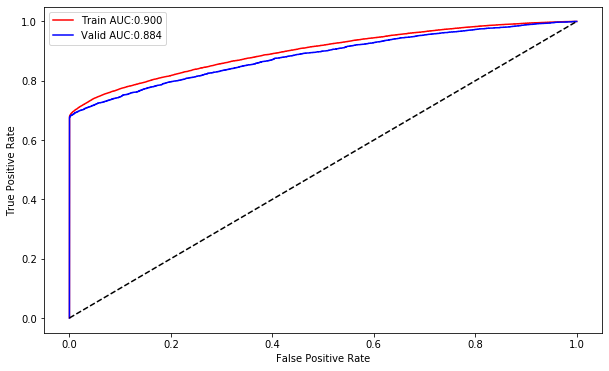

In [186]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_preds)
auc_val = roc_auc_score(y_val, y_val_preds)

#fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
#auc_test = roc_auc_score(y_test, y_test_preds)

fig, ax = plt.subplots(figsize=(10,6)) 
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_val, tpr_val, 'b-',label ='Valid AUC:%.3f'%auc_val)
#plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## FIND THE TEST RESULTS

In [187]:
best_model = cat_model
y_test_preds = best_model.predict(df_test_new_imputed_enc)

In [188]:
y_test_preds


array([0., 0., 0., ..., 0., 0., 0.])

In [189]:
# Create a submisison dataframe and append the relevant columns


In [190]:

Submission_Insurance = pd.DataFrame()
Submission_Insurance['ID'] = df_test['ID']
Submission_Insurance['Response'] = y_test_preds
Submission_Insurance.head()

,ID,Response
0,50883,0.0
1,50884,0.0
2,50885,0.0
3,50886,0.0
4,50887,0.0


In [191]:
Submission_Insurance.shape

(21805, 2)

In [192]:
Submission_Insurance.to_csv('cat_model_imputation.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
